In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import nltk
import string
from nltk.corpus import stopwords
from nltk.classify import SklearnClassifier
from nltk.tokenize import sent_tokenize, word_tokenize
import time
import nltk.classify.util
from nltk.classify import NaiveBayesClassifier
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

In [2]:
df=pd.read_excel("Hotel_Feedback_Table_Structure.xlsx", "Feedback")
df.head()

,Id,FullName,Email,Mob no,Comment,RatingId,RatingName
0,1.0,SHRIDHAR TRIVEDI,shridhartrivedi@gmail.com,9.031236e+09,"We booked a 3 night stay to play some tennis,...",1,5
1,2.0,ASHUTOSH BHATNAGAR,ashutoshbhatnagar@gmail.com,9.031236e+09,Amazing place. Everyone was extremely warm and...,2,5
2,3.0,ABHASH SAXENA,abhashsaxena@gmail.com,9.031236e+09,"Even though we were having problems, i.e. Feat...",1,5
3,4.0,SAURABH BANERJEE,saurabhbanerjee@gmail.com,9.031236e+09,Currently in bed writing this for the past hr ...,3,2
4,5.0,NIHARIKA PAWAR,niharikapawar@gmail.com,9.031236e+09,I live in Md and the Aloft is my Home away fro...,2,5


In [3]:
#create a label

df["label"] = df["RatingName"].apply(lambda x: 1 if x < 2.5 else 0)
df.head()

,Id,FullName,Email,Mob no,Comment,RatingId,RatingName,label
0,1.0,SHRIDHAR TRIVEDI,shridhartrivedi@gmail.com,9.031236e+09,"We booked a 3 night stay to play some tennis,...",1,5,0
1,2.0,ASHUTOSH BHATNAGAR,ashutoshbhatnagar@gmail.com,9.031236e+09,Amazing place. Everyone was extremely warm and...,2,5,0
2,3.0,ABHASH SAXENA,abhashsaxena@gmail.com,9.031236e+09,"Even though we were having problems, i.e. Feat...",1,5,0
3,4.0,SAURABH BANERJEE,saurabhbanerjee@gmail.com,9.031236e+09,Currently in bed writing this for the past hr ...,3,2,1
4,5.0,NIHARIKA PAWAR,niharikapawar@gmail.com,9.031236e+09,I live in Md and the Aloft is my Home away fro...,2,5,0


In [4]:
# return the wordnet object value corresponding to the POS tag
from nltk.corpus import wordnet

def get_wordnet_pos(pos_tag):
    if pos_tag.startswith('J'):
        return wordnet.ADJ
    elif pos_tag.startswith('V'):
        return wordnet.VERB
    elif pos_tag.startswith('N'):
        return wordnet.NOUN
    elif pos_tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN
import string
from nltk import pos_tag
from nltk.corpus import stopwords
from nltk.tokenize import WhitespaceTokenizer
from nltk.stem import WordNetLemmatizer

def clean_text(text):
    # lower text
    text = text.lower()
    # tokenize text and remove puncutation
    text = [word.strip(string.punctuation) for word in text.split(" ")]
    # remove words that contain numbers
    text = [word for word in text if not any(c.isdigit() for c in word)]
    # remove stop words
    stop = stopwords.words('english')
    text = [x for x in text if x not in stop]
    # remove empty tokens
    text = [t for t in text if len(t) > 0]
    # pos tag text
    pos_tags = pos_tag(text)
    # lemmatize text
    text = [WordNetLemmatizer().lemmatize(t[0], get_wordnet_pos(t[1])) for t in pos_tags]
    # remove words with only one letter
    text = [t for t in text if len(t) > 1]
    # join all
    text = " ".join(text)
    return(text)


# clean text data
df["Comment_clean"] = df["Comment"].apply(lambda x: clean_text(x))

In [5]:
# add sentiment anaylsis columns
from nltk.sentiment.vader import SentimentIntensityAnalyzer

sid = SentimentIntensityAnalyzer()
df["sentiments"] = df["Comment"].apply(lambda x: sid.polarity_scores(x))
df = pd.concat([df.drop(['sentiments'], axis=1), df['sentiments'].apply(pd.Series)], axis=1)
df.head()

,Id,FullName,Email,Mob no,Comment,RatingId,RatingName,label,Comment_clean,neg,neu,pos,compound
0,1.0,SHRIDHAR TRIVEDI,shridhartrivedi@gmail.com,9.031236e+09,"We booked a 3 night stay to play some tennis,...",1,5,0,book night stay play tennis since one high rat...,0.000,0.718,0.282,0.9748
1,2.0,ASHUTOSH BHATNAGAR,ashutoshbhatnagar@gmail.com,9.031236e+09,Amazing place. Everyone was extremely warm and...,2,5,0,amazing place everyone extremely warm welcomin...,0.000,0.654,0.346,0.9650
2,3.0,ABHASH SAXENA,abhashsaxena@gmail.com,9.031236e+09,"Even though we were having problems, i.e. Feat...",1,5,0,even though problem i.e feather allergy flat t...,0.096,0.676,0.228,0.5719
3,4.0,SAURABH BANERJEE,saurabhbanerjee@gmail.com,9.031236e+09,Currently in bed writing this for the past hr ...,3,2,1,currently bed write past hr dog bark squeal ca...,0.000,1.000,0.000,0.0000
4,5.0,NIHARIKA PAWAR,niharikapawar@gmail.com,9.031236e+09,I live in Md and the Aloft is my Home away fro...,2,5,0,live md aloft home away home...we stayed night...,0.000,0.838,0.162,0.8713


In [6]:
# add number of characters column
df["nb_chars"] = df["Comment"].apply(lambda x: len(x))
df.head()

,Id,FullName,Email,Mob no,Comment,RatingId,RatingName,label,Comment_clean,neg,neu,pos,compound,nb_chars
0,1.0,SHRIDHAR TRIVEDI,shridhartrivedi@gmail.com,9.031236e+09,"We booked a 3 night stay to play some tennis,...",1,5,0,book night stay play tennis since one high rat...,0.000,0.718,0.282,0.9748,453
1,2.0,ASHUTOSH BHATNAGAR,ashutoshbhatnagar@gmail.com,9.031236e+09,Amazing place. Everyone was extremely warm and...,2,5,0,amazing place everyone extremely warm welcomin...,0.000,0.654,0.346,0.9650,283
2,3.0,ABHASH SAXENA,abhashsaxena@gmail.com,9.031236e+09,"Even though we were having problems, i.e. Feat...",1,5,0,even though problem i.e feather allergy flat t...,0.096,0.676,0.228,0.5719,146
3,4.0,SAURABH BANERJEE,saurabhbanerjee@gmail.com,9.031236e+09,Currently in bed writing this for the past hr ...,3,2,1,currently bed write past hr dog bark squeal ca...,0.000,1.000,0.000,0.0000,198
4,5.0,NIHARIKA PAWAR,niharikapawar@gmail.com,9.031236e+09,I live in Md and the Aloft is my Home away fro...,2,5,0,live md aloft home away home...we stayed night...,0.000,0.838,0.162,0.8713,307


In [7]:
# add number of words column
df["nb_words"] = df["Comment"].apply(lambda x: len(x.split(" ")))
df.head()

,Id,FullName,Email,Mob no,Comment,RatingId,RatingName,label,Comment_clean,neg,neu,pos,compound,nb_chars,nb_words
0,1.0,SHRIDHAR TRIVEDI,shridhartrivedi@gmail.com,9.031236e+09,"We booked a 3 night stay to play some tennis,...",1,5,0,book night stay play tennis since one high rat...,0.000,0.718,0.282,0.9748,453,79
1,2.0,ASHUTOSH BHATNAGAR,ashutoshbhatnagar@gmail.com,9.031236e+09,Amazing place. Everyone was extremely warm and...,2,5,0,amazing place everyone extremely warm welcomin...,0.000,0.654,0.346,0.9650,283,52
2,3.0,ABHASH SAXENA,abhashsaxena@gmail.com,9.031236e+09,"Even though we were having problems, i.e. Feat...",1,5,0,even though problem i.e feather allergy flat t...,0.096,0.676,0.228,0.5719,146,22
3,4.0,SAURABH BANERJEE,saurabhbanerjee@gmail.com,9.031236e+09,Currently in bed writing this for the past hr ...,3,2,1,currently bed write past hr dog bark squeal ca...,0.000,1.000,0.000,0.0000,198,37
4,5.0,NIHARIKA PAWAR,niharikapawar@gmail.com,9.031236e+09,I live in Md and the Aloft is my Home away fro...,2,5,0,live md aloft home away home...we stayed night...,0.000,0.838,0.162,0.8713,307,58


In [8]:
# create doc2vec vector columns
from gensim.test.utils import common_texts
from gensim.models.doc2vec import Doc2Vec, TaggedDocument

documents = [TaggedDocument(doc, [i]) for i, doc in enumerate(df["Comment_clean"].apply(lambda x: x.split(" ")))]

# train a Doc2Vec model with our text data
model = Doc2Vec(documents, vector_size=5, window=2, min_count=1, workers=4)

# transform each document into a vector data
doc2vec_df = df["Comment_clean"].apply(lambda x: model.infer_vector(x.split(" "))).apply(pd.Series)
doc2vec_df.columns = ["doc2vec_vector_" + str(x) for x in doc2vec_df.columns]
df = pd.concat([df, doc2vec_df], axis=1)
df.head()

C:\Users\Shraddha Singh\Anaconda3\lib\site-packages\gensim\models\base_any2vec.py:743: UserWarning: C extension not loaded, training will be slow. Install a C compiler and reinstall gensim for fast training.
  "C extension not loaded, training will be slow. "


,Id,FullName,Email,Mob no,Comment,RatingId,RatingName,label,Comment_clean,neg,neu,pos,compound,nb_chars,nb_words,doc2vec_vector_0,doc2vec_vector_1,doc2vec_vector_2,doc2vec_vector_3,doc2vec_vector_4
0,1.0,SHRIDHAR TRIVEDI,shridhartrivedi@gmail.com,9.031236e+09,"We booked a 3 night stay to play some tennis,...",1,5,0,book night stay play tennis since one high rat...,0.000,0.718,0.282,0.9748,453,79,-0.159949,0.065531,0.032472,0.120968,0.128173
1,2.0,ASHUTOSH BHATNAGAR,ashutoshbhatnagar@gmail.com,9.031236e+09,Amazing place. Everyone was extremely warm and...,2,5,0,amazing place everyone extremely warm welcomin...,0.000,0.654,0.346,0.9650,283,52,-0.014534,-0.028983,-0.096187,0.031896,0.079616
2,3.0,ABHASH SAXENA,abhashsaxena@gmail.com,9.031236e+09,"Even though we were having problems, i.e. Feat...",1,5,0,even though problem i.e feather allergy flat t...,0.096,0.676,0.228,0.5719,146,22,-0.051444,-0.026721,-0.054128,0.010885,0.052133
3,4.0,SAURABH BANERJEE,saurabhbanerjee@gmail.com,9.031236e+09,Currently in bed writing this for the past hr ...,3,2,1,currently bed write past hr dog bark squeal ca...,0.000,1.000,0.000,0.0000,198,37,-0.116357,0.058410,0.015247,-0.035893,0.059985
4,5.0,NIHARIKA PAWAR,niharikapawar@gmail.com,9.031236e+09,I live in Md and the Aloft is my Home away fro...,2,5,0,live md aloft home away home...we stayed night...,0.000,0.838,0.162,0.8713,307,58,-0.131904,-0.055834,0.013463,0.131775,-0.008593


In [9]:
# add tf-idfs columns
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(min_df = 10)
tfidf_result = tfidf.fit_transform(df["Comment_clean"]).toarray()
tfidf_df = pd.DataFrame(tfidf_result, columns = tfidf.get_feature_names())
tfidf_df.columns = ["word_" + str(x) for x in tfidf_df.columns]
tfidf_df.index = df.index
df = pd.concat([df, tfidf_df], axis=1)
df.head()

,Id,FullName,Email,Mob no,Comment,RatingId,RatingName,label,Comment_clean,neg,...,word_view,word_wait,word_walk,word_wall,word_water,word_way,word_well,word_window,word_work,word_would
0,1.0,SHRIDHAR TRIVEDI,shridhartrivedi@gmail.com,9.031236e+09,"We booked a 3 night stay to play some tennis,...",1,5,0,book night stay play tennis since one high rat...,0.000,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.209818,0.0,0.0,0.0
1,2.0,ASHUTOSH BHATNAGAR,ashutoshbhatnagar@gmail.com,9.031236e+09,Amazing place. Everyone was extremely warm and...,2,5,0,amazing place everyone extremely warm welcomin...,0.000,...,0.0,0.588811,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
2,3.0,ABHASH SAXENA,abhashsaxena@gmail.com,9.031236e+09,"Even though we were having problems, i.e. Feat...",1,5,0,even though problem i.e feather allergy flat t...,0.096,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
3,4.0,SAURABH BANERJEE,saurabhbanerjee@gmail.com,9.031236e+09,Currently in bed writing this for the past hr ...,3,2,1,currently bed write past hr dog bark squeal ca...,0.000,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
4,5.0,NIHARIKA PAWAR,niharikapawar@gmail.com,9.031236e+09,I live in Md and the Aloft is my Home away fro...,2,5,0,live md aloft home away home...we stayed night...,0.000,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0


In [10]:
df.shape

(499, 188)

In [11]:
# show is_bad_review distribution
df["label"].value_counts(normalize = True)

0    0.61523
1    0.38477
Name: label, dtype: float64

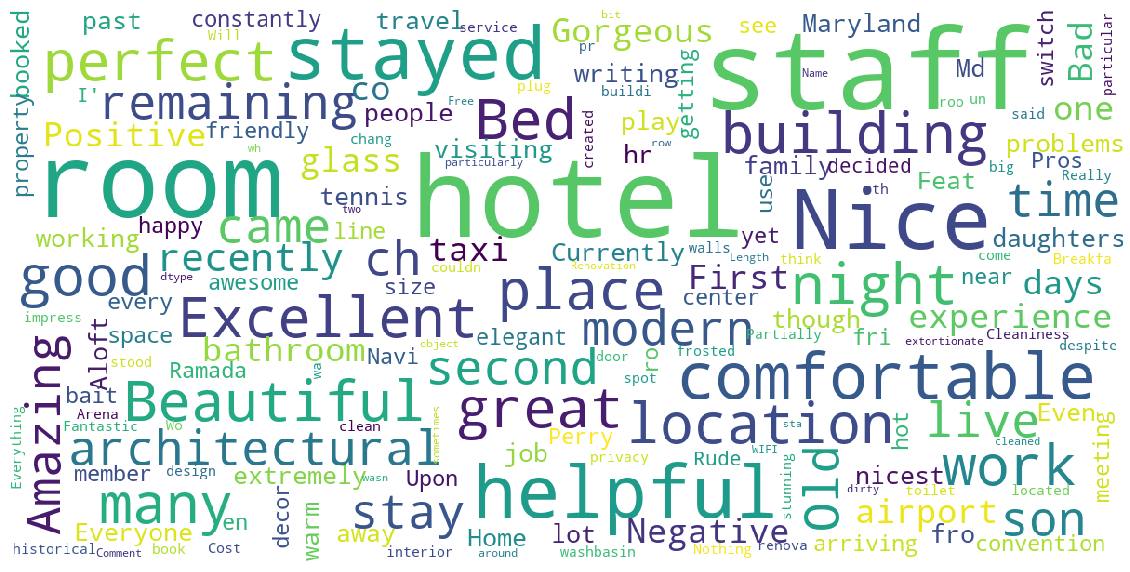

In [12]:
# wordcloud function

from wordcloud import WordCloud
import matplotlib.pyplot as plt

def show_wordcloud(data, title = None):
    wordcloud = WordCloud(
        background_color = 'white',
        max_words = 200,
        max_font_size = 40, 
        scale = 3,
        random_state = 42
    ).generate(str(data))

    fig = plt.figure(1, figsize = (20, 20))
    plt.axis('off')
    if title: 
        fig.suptitle(title, fontsize = 20)
        fig.subplots_adjust(top = 2.3)

    plt.imshow(wordcloud)
    plt.show()
    
# print wordcloud
show_wordcloud(df["Comment"])

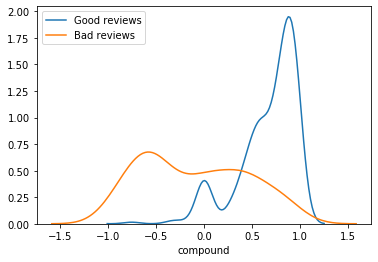

In [13]:
# plot sentiment distribution for positive and negative reviews

import seaborn as sns

for x in [0, 1]:
    subset = df[df['label'] == x]
    
    # Draw the density plot
    if x == 0:
        label = "Good reviews"
    else:
        label = "Bad reviews"
    sns.distplot(subset['compound'], hist = False, label = label)

In [16]:
# highest positive sentiment reviews (with more than 5 words)
df[df["nb_words"] >= 2.5].sort_values("pos", ascending = False)[["Comment", "pos"]].head()

,Comment,pos
111,Great room great staff great food,0.804
236,Great location lovely room,0.798
153,I loved everything,0.796
473,beautiful interior,0.796
325,Excellent Breakfasts,0.787


In [17]:
# lowest negative sentiment reviews (with more than 5 words)
df[df["nb_words"] >=2.5].sort_values("neg", ascending = False)[["Comment", "neg"]].head()

,Comment,neg
434,We didn t have a bad experience,0.467
129,Water pressure in my shower was no existent F...,0.441
45,I was really disappointed with the TV service....,0.371
403,The hotel looked abit tired lots of scratches...,0.336
104,not cleaned well lady pushing to pay during m...,0.311
